# Quality analysis full table merge

## Imports & configs

In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# pandas configs
pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 500)

In [3]:
path = "../../../data/processed/1.1 - full merge - num all na -1 - date cols transformed.feather"

if not os.path.isfile(path):
    raise Exception(f"file not founded: {path}")

## Loading dataset

In [4]:
df = pd.read_feather(path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1231015 entries, 0 to 1231014
Columns: 148 entries, NUM_SECU_EXPED to FECHA_SINI_Elapsed
dtypes: bool(1), datetime64[ns](1), float64(74), int16(10), int32(2), int64(2), int8(58)
memory usage: 825.3 MB


/home/voolkia/anaconda3/lib/python3.6/site-packages/pyarrow/pandas_compat.py:752: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels


In [6]:
df.head()

,NUM_SECU_EXPED,cond_04,cond_05,cond_06,cond_09,cond_11,cond_12,cond_32,cond_37,cond_C1,cond_C10,cond_C11,cond_C12,cond_C13,cond_C14,cond_C15,cond_C16,cond_C17,cond_C18,cond_C19,cond_C2,cond_C20,cond_C21,cond_C3,cond_C4,cond_C5,cond_C6,cond_C7,cond_C8,cond_C9,USR_ACT,total_condicion,es_gte_5,COD_FRAUDE,COD_RAMO,EXISTE_FRAUDE,EXISTE_INHABILITAR,EXISTE_INVEST,preg_1,preg_2,preg_3,preg_4,preg_5,preg_6,preg_7,preg_8,preg_9,preg_10,preg_11,preg_12,preg_15,preg_16,preg_18,preg_19,preg_22,preg_24,preg_27,preg_28,preg_30,preg_31,preg_32,preg_33,preg_34,preg_36,preg_37,CATASTROFICO,CERRADURA_BAUL,CERRADURA_DERECHA,CERRADURA_IZQUIERDA,CODIGO_BAJA,CODIGO_CARATULA,CODIGO_REAPERTURA,CODIGO_VEHICULO,COD_ACT_BENEF,COD_CAUSA_SINI,COD_POST_OCURRENCIA,COD_POST_POLIZA,COD_POST_TERC,COD_RAMO_sini,COD_RIES_sini,CONDICION_ROBO_EXP50,DANOS_MATERIALES,DESCRIPCION_TIPO,DESCRIPCION_VEHICULO,ESTADO_CIVIL,ESTADO_CIVIL_TERC,ESTAD_VEH_ASEG,FALTANTE,FECHA_SINI,MCA_COASEG,MCA_JUICIO,MCA_VIP,METRO,NUM_SECU_POL,OCUPACION_ASEG,SEXO,SEXO_TERC,TELEFONO_TERC,TIPO,TIPO_EXPED,TIPO_LESION,TIPO_LESION_MAXIMA,TIPO_SINIESTRO,USO,dias_entre_denu_y_sini,dist_fformal_fsini,dist_fformal_fdenu,existe_FECHA_FORMAL,CANT_RENOVACION,CAPITAL_ACCESORIOS,CAPITAL_ASEGURADO_COTIZACION,CAPITAL_VEHICULO,COD_COBRO,COD_COBRO_ANTERIOR,COD_POSTAL,COD_PROD,COD_RAMO_vigabt_aseg_cif,COD_RIES_vigabt_aseg_cif,COD_ZONA_CASCO,COD_ZONA_RC,COD_ZONA_ROBO,CONV_COMISIONARIO,CIF_ID,MCA_AGRAVANTE,MCA_EMPLEADO,MCA_MOVIMIENTO,MCA_POLIZA_VIP,NEGOCIO,PRENDARIO,SEGMENTO,cambio_cobro,ANTIG_pol,COD_EST_CIVIL,SEXO_ASEG,TIPO_ACTIVIDAD,CLIENTE,CODIGO_NACION,DATECO_TIPO_ACTIVIDAD,DOMICILIO_CODIGO_POSTAL,HABILITADO,FECHA_SINI_Year,FECHA_SINI_Month,FECHA_SINI_Week,FECHA_SINI_Day,FECHA_SINI_Dayofweek,FECHA_SINI_Dayofyear,FECHA_SINI_Is_month_end,FECHA_SINI_Is_month_start,FECHA_SINI_Is_quarter_end,FECHA_SINI_Is_quarter_start,FECHA_SINI_Is_year_end,FECHA_SINI_Is_year_start,FECHA_SINI_Hour,FECHA_SINI_Minute,FECHA_SINI_Second,FECHA_SINI_Elapsed
0,516359994,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.0,3.0,SALINASL,4.0,False,NaN,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,NaN,None,NaT,None,None,None,None,NaN,NaN,None,None,None,NaN,None,None,None,None,NaN,NaN,NaN,NaN,None,NaN,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,None,None,None,None,None,None,None,None,NaN,None,None,None,None,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,-9223372037
1,1762619999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,COLOMBOM,0.0,False,NaN,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,NaN,None,NaT,None,None,None,None,NaN,NaN,None,None,None,NaN,None,None,None,None,NaN,NaN,NaN,NaN,None,NaN,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,None,None,None,None,None,None,None,None,NaN,None,None,None,None,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,-9223372037
2,4768809999,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,3.0,ALAIS,3.0,False,NaN,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,NaN,None,NaT,None,None,None,None,NaN,NaN,None,None,None,NaN,None,None,None,None,NaN,NaN,NaN,NaN,None,NaN,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,None,None,No

## Nulls control

In [6]:
df.isna().mean().sort_values(ascending=False)

CODIGO_BAJA                     0.998755
preg_1                          0.997936
preg_22                         0.993882
preg_37                         0.991660
preg_18                         0.991639
preg_19                         0.991639
preg_24                         0.991639
cond_C14                        0.991335
cond_37                         0.990541
COD_FRAUDE                      0.990189
preg_12                         0.989826
preg_27                         0.989826
preg_28                         0.989826
preg_16                         0.989826
preg_30                         0.989826
EXISTE_FRAUDE                   0.989649
EXISTE_INHABILITAR              0.989649
EXISTE_INVEST                   0.989649
COD_RAMO                        0.989649
cond_C4                         0.989384
CONDICION_ROBO_EXP50            0.989381
cond_12                         0.988531
cond_C3                         0.988441
cond_C2                         0.988441
cond_C5         

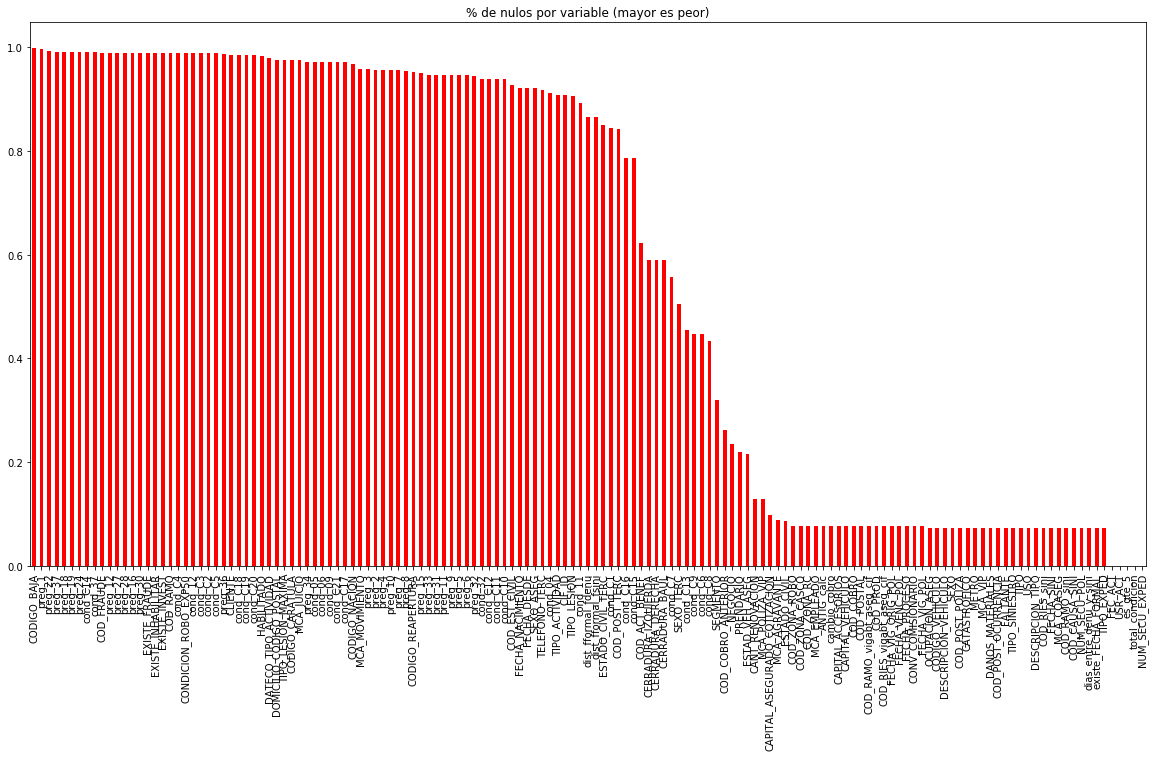

In [12]:
plt.figure(figsize=(20,10))
df.isna().mean().sort_values(ascending=False).plot.bar(color="r")
plt.title("% de nulos por variable (mayor es peor)")
plt.show()

## plot correlation matrix

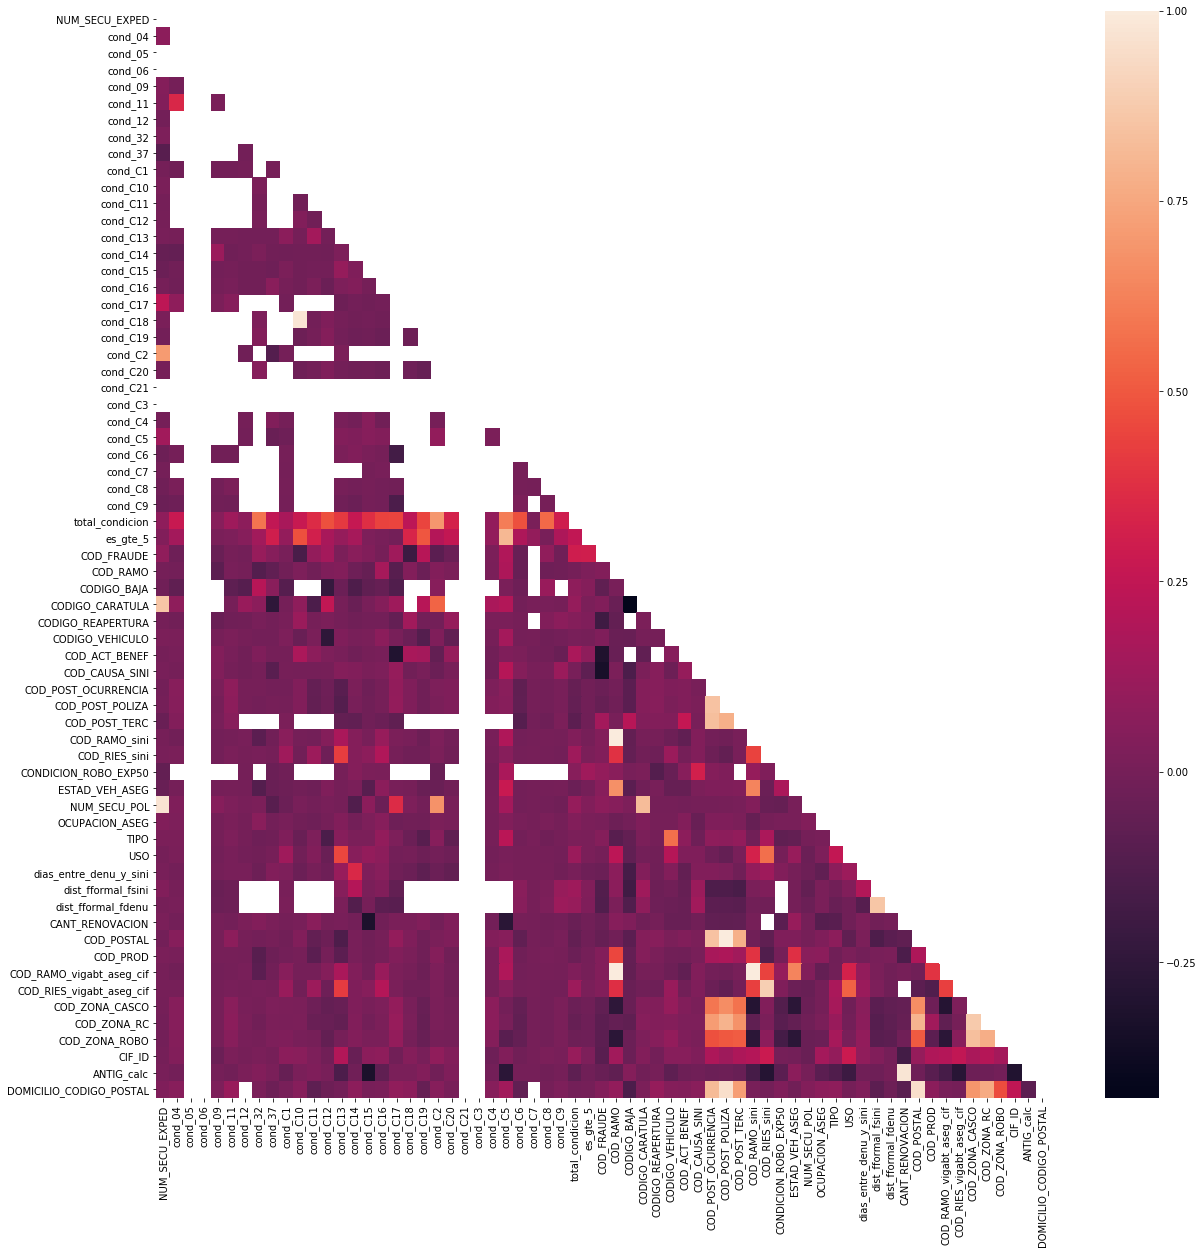

In [17]:
corr = df.corr(method="spearman")
# creating diagonal mask
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# making the plot
plt.figure(figsize=(20,20))
sns.heatmap(corr, square=False, mask=mask)
plt.show()

## TIPO_EXPED analysis

In [10]:
df.groupby("TIPO_EXPED")["EXISTE_FRAUDE"].value_counts().unstack(fill_value=0)

EXISTE_FRAUDE,False,True
TIPO_EXPED,,
001,22,12
002,492,171
003,207,66
010,149,48
020,112,22
050,2308,210
060,1758,1639
1,23,15
10,112,47


In [9]:
df.groupby(["TIPO_EXPED", "EXISTE_FRAUDE"]).size().unstack(fill_value=0)

EXISTE_FRAUDE,False,True
TIPO_EXPED,,
001,22,12
002,492,171
003,207,66
010,149,48
020,112,22
050,2308,210
060,1758,1639
1,23,15
10,112,47


## COD_RAMO ANALYSIS

In [18]:
# control COD_RAMO distrib by target
# DATA LEAKAGE
df.groupby("EXISTE_FRAUDE")["COD_RAMO"].value_counts(dropna=False).unstack(fill_value=0)

COD_RAMO,-1.0,1.0,2.0,8.0,9.0
EXISTE_FRAUDE,,,,,
-1,1218273,0,0,0,0
0,0,5955,536,1951,386
1,0,2865,191,751,107


In [21]:
# comparing difference between COD_RAMO_sini & COD_RAMO_vigabt_aseg_cif
(df["COD_RAMO_sini"] != df["COD_RAMO_vigabt_aseg_cif"]).sum()

5781

**5781 different values**

In [25]:
df[(df["COD_RAMO_sini"] != df["COD_RAMO_vigabt_aseg_cif"]) & (df["COD_RAMO_vigabt_aseg_cif"] == -1)][["COD_RAMO_sini", "COD_RAMO_vigabt_aseg_cif"]].head()

,COD_RAMO_sini,COD_RAMO_vigabt_aseg_cif
68043,1.0,-1.0
71016,8.0,-1.0
71023,8.0,-1.0
71028,8.0,-1.0
71032,8.0,-1.0


**use COD_RAMO_sini**

## COD_RIES analysis

In [26]:
df.groupby("EXISTE_FRAUDE")["COD_RIES_sini"].value_counts(dropna=False).unstack(fill_value=0)

COD_RIES_sini,-1.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0,51.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0,60.0,61.0,62.0,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71.0,72.0,73.0,74.0,75.0,76.0,77.0,78.0,79.0,80.0,81.0,82.0,83.0,84.0,85.0,86.0,87.0,88.0,89.0,90.0,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0,100.0,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0,116.0,117.0,118.0,119.0,120.0,121.0,122.0,123.0,124.0,125.0,126.0,127.0,128.0,129.0,130.0,131.0,132.0,133.0,134.0,135.0,136.0,137.0,138.0,139.0,140.0,141.0,142.0,143.0,144.0,145.0,146.0,147.0,148.0,149.0,150.0,151.0,152.0,153.0,154.0,155.0,156.0,157.0,158.0,159.0,160.0,161.0,162.0,163.0,164.0,165.0,166.0,167.0,168.0,169.0,170.0,171.0,172.0,173.0,174.0,175.0,176.0,177.0,178.0,179.0,180.0,181.0,182.0,183.0,184.0,185.0,186.0,187.0,188.0,189.0,190.0,191.0,192.0,193.0,194.0,195.0,196.0,197.0,198.0,199.0,200.0,201.0,202.0,203.0,204.0,205.0,206.0,207.0,208.0,209.0,210.0,211.0,212.0,213.0,214.0,215.0,216.0,217.0,218.0,219.0,220.0,221.0,222.0,223.0,224.0,225.0,226.0,227.0,228.0,229.0,230.0,231.0,232.0,233.0,234.0,235.0,236.0,237.0,238.0,239.0,240.0,241.0,242.0,243.0,244.0,245.0,246.0,247.0,248.0,249.0,...,739.0,740.0,741.0,742.0,743.0,744.0,745.0,746.0,747.0,748.0,749.0,750.0,751.0,752.0,753.0,754.0,755.0,756.0,757.0,758.0,759.0,760.0,761.0,762.0,763.0,764.0,765.0,766.0,767.0,768.0,769.0,770.0,771.0,772.0,773.0,774.0,775.0,776.0,777.0,778.0,779.0,780.0,781.0,782.0,783.0,784.0,785.0,786.0,787.0,788.0,789.0,790.0,791.0,792.0,793.0,794.0,795.0,796.0,797.0,798.0,799.0,800.0,801.0,802.0,803.0,804.0,805.0,806.0,807.0,808.0,809.0,810.0,811.0,812.0,813.0,814.0,815.0,816.0,817.0,818.0,819.0,820.0,821.0,822.0,823.0,824.0,825.0,826.0,827.0,828.0,829.0,830.0,831.0,832.0,833.0,834.0,835.0,836.0,837.0,838.0,839.0,840.0,841.0,842.0,843.0,844.0,845.0,846.0,847.0,848.0,851.0,852.0,853.0,854.0,855.0,856.0,857.0,858.0,859.0,860.0,861.0,862.0,863.0,864.0,865.0,866.0,867.0,868.0,869.0,870.0,871.0,872.0,873.0,874.0,875.0,876.0,877.0,878.0,879.0,880.0,882.0,883.0,884.0,885.0,886.0,887.0,888.0,889.0,890.0,891.0,892.0,893.0,894.0,895.0,896.0,897.0,899.0,901.0,902.0,903.0,904.0,905.0,906.0,907.0,908.0,909.0,910.0,911.0,912.0,913.0,915.0,916.0,917.0,918.0,919.0,920.0,921.0,922.0,923.0,924.0,925.0,926.0,927.0,928.0,929.0,930.0,931.0,933.0,934.0,935.0,936.0,938.0,939.0,940.0,941.0,942.0,943.0,944.0,945.0,946.0,947.0,948.0,949.0,951.0,952.0,953.0,954.0,955.0,956.0,957.0,958.0,959.0,960.0,961.0,962.0,963.0,964.0,965.0,966.0,967.0,968.0,969.0,972.0,973.0,974.0,975.0,976.0,977.0,978.0,979.0,980.0,981.0,982.0,983.0,984.0,985.0,986.0,987.0,988.0,989.0,990.0,991.0,992.0,993.0,994.0,995.0,996.0,997.0,998.0,999.0
EXISTE_FRAUDE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
-1,89347,1072449,5243,5006,3935,3135,2437,1878,1555,1245,1049,899,811,647,630,493,432,452,324,351,300,279,331,274,264,218,265,227,188,212,218,164,167,134,161,142,148,102,123,77,93,104,75,89,99,84,68,57,68,74,69,61,46,58,38,69,54,76,58,71,52,43,43,35,45,49,45,43,59,42,40,46,35,63,50,39,36,48,38,39,38,33,30,36,43,75,37,40,50,35,39,37,80,50,40,31,29,50,34,38,56,74,62,69,59,90,61,59,86,60,85,63,69,80,67,65,63,44,61,48,77,76,57,54,66,66,57,82,81,88,79,70,78,84,92,62,59,60,97,55,67,54,66,51,54,45,57,86,69,52,44,80,52,46,52,24,47,41,25,21,30,41,29,40,22,32,51,43,28,31,36,54,42

In [27]:
df.groupby("EXISTE_FRAUDE")["COD_RIES_vigabt_aseg_cif"].value_counts(dropna=False).unstack(fill_value=0)

COD_RIES_vigabt_aseg_cif,-1.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0,51.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0,60.0,61.0,62.0,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71.0,72.0,73.0,74.0,75.0,76.0,77.0,78.0,79.0,80.0,82.0,83.0,84.0,85.0,86.0,87.0,88.0,89.0,90.0,91.0,92.0,94.0,95.0,96.0,97.0,98.0,99.0,100.0,101.0,102.0,103.0,104.0,105.0,107.0,108.0,109.0,111.0,112.0,113.0,115.0,116.0,117.0,120.0,121.0,122.0,123.0,125.0,130.0,132.0,133.0,134.0,136.0,137.0,138.0,140.0,142.0,143.0,144.0,145.0,146.0,149.0,150.0,151.0,156.0,158.0,162.0,163.0,167.0,169.0,170.0,172.0,174.0,175.0,177.0,178.0,179.0,180.0,181.0,182.0,183.0,184.0,185.0,186.0,189.0,190.0,191.0,192.0,196.0,197.0,198.0,199.0,201.0,204.0,205.0,209.0,216.0,223.0,224.0,228.0,229.0,233.0,234.0,238.0,241.0,242.0,243.0,249.0,250.0,252.0,256.0,258.0,259.0,262.0,263.0,264.0,267.0,268.0,269.0,270.0,273.0,275.0,284.0,289.0,290.0,292.0,293.0,298.0,304.0,305.0,308.0,312.0,314.0,317.0,327.0,330.0,339.0,353.0,354.0,364.0,371.0,374.0,380.0,385.0,391.0,392.0,395.0,397.0,398.0,402.0,407.0,408.0,413.0,421.0,452.0,454.0,466.0,475.0,490.0,534.0,547.0,559.0,562.0,566.0,581.0,590.0,599.0,601.0,613.0,616.0,672.0,723.0,742.0,762.0,901.0,917.0,969.0
EXISTE_FRAUDE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
-1,95058,1070391,2787,5003,4044,3101,2688,2100,1588,1405,940,1045,698,730,652,480,1227,490,321,231,269,223,194,123,212,179,113,245,176,150,162,177,81,154,85,93,155,137,74,100,67,58,90,36,41,54,116,18,49,39,54,34,98,42,13,70,28,44,24,54,63,21,26,17,18,12,25,9,50,9,32,38,33,24,17,7,2,1,6,6,1,8,3,23,52,66,24,25,13,69,10,10,2,31,2,50,41,275,5,3,43,74,9,68,32,9,39,18,2,5,6,10,5,10,28,7,27,28,3,7,549,1,10,9,34,377,10,396,34,2,3,532,3,54,436,11,1,51,8,4,2,45,4,1,1,32,61,46,137,2,6,2,2,3,191,1,39,636,452,7,165,18,3,10,14,9,45,70,43,3,124,43,20,87,36,20,34,8,6,7,2,18,1,40,40,11,46,5,26,11,7,90,33,25,9,19,86,3,34,12,9,14,70,19,251,109,66,7,748,40,7,1874,123,416,2184,134,3,365,2455,15,38,210,6,1305,369,403,2,5,2,167,27,27,18,2,4,20,6,108,50,19,313,27,19,12,27,21,10
0,239,8278,26,36,40,31,18,19,11,10,8,10,7,8,5,3,9,4,3,2,2,0,1,1,0,1,0,2,0,0,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,1,0,0,0,0,1,0,0,4,0,0,7,2,0,1,3,0,0,2,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
1,131,3697,3,13,12,6,12,7,3,1,5,2,2,1,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [28]:
# comparing difference between COD_RAMO_sini & COD_RAMO_vigabt_aseg_cif
(df["COD_RIES_sini"] != df["COD_RIES_vigabt_aseg_cif"]).sum()

57955

**57955 different values**

In [31]:
df[(df["COD_RIES_sini"] != df["COD_RIES_vigabt_aseg_cif"]) & (df["COD_RIES_vigabt_aseg_cif"] == -1)][["COD_RIES_sini", "COD_RIES_vigabt_aseg_cif"]].head()

,COD_RIES_sini,COD_RIES_vigabt_aseg_cif
68043,1.0,-1.0
71016,1.0,-1.0
71023,1.0,-1.0
71028,1.0,-1.0
71032,1.0,-1.0


## Analysis SEXO

In [32]:
df.groupby("EXISTE_FRAUDE")["SEXO"].value_counts(dropna=False).unstack(fill_value=0)

SEXO,-1,0,1
EXISTE_FRAUDE,,,
-1,89435,326047,802791
0,195,1899,6734
1,105,735,3074


In [33]:
df.groupby("EXISTE_FRAUDE")["SEXO_ASEG"].value_counts(dropna=False).unstack(fill_value=0)

SEXO_ASEG,-1,0,1
EXISTE_FRAUDE,,,
-1,1122301,26799,69173
0,8331,121,376
1,3778,32,104


In [34]:
(df["SEXO"] != df["SEXO_ASEG"]).sum()

1057954

In [36]:
df[(df["SEXO"] != df["SEXO_ASEG"]) & (df["SEXO"] == -1)][["SEXO", "SEXO_ASEG"]].head()

,SEXO,SEXO_ASEG
758186,-1,1
758960,-1,1


## COD_ACT_BENEF Analysis

In [5]:
df.groupby("EXISTE_FRAUDE")["COD_ACT_BENEF"].value_counts(dropna=False).unstack(fill_value=0)

COD_ACT_BENEF,-1.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,10.0,15.0,16.0,18.0,24.0,25.0,26.0,29.0,50.0,51.0,98.0,99.0
EXISTE_FRAUDE,,,,,,,,,,,,,,,,,,,,,
-1,763036,115877,2789,144636,16769,23,1450,43960,2464,58618,51186,88,3170,2005,1158,7149,419,383,189,1007,1897
0,3623,1348,1,367,46,0,82,123,19,997,60,1,62,609,405,1012,17,8,46,0,2
1,846,39,1,3,23,0,2,66,13,24,7,0,22,10,16,2836,1,1,1,0,3
